In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
%pylab inline
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cnpj_final = pd.read_csv('/content/drive/MyDrive/TCC - PUC/dataset_final.csv',encoding='ISO-8859-1', sep=';' ,dtype=str, header=0)

In [6]:
cnpj_final[["capital_social","casosAcumulado_covid","obitosAcumulado_covid","casos_acumulados_porcentagem_covid","obitos_acumulados_porcentagem_covid","IDH DO MUNICIPIO","IDHM EDUCACAO DO MUNICIPIO","IDHM LONGEVIDADE DO MUNICIPIO","IDHM RENDA DO MUNICIPIO","PIB","PIB PER CAPITA"]] = cnpj_final[["capital_social", "casosAcumulado_covid","obitosAcumulado_covid","casos_acumulados_porcentagem_covid","obitos_acumulados_porcentagem_covid", "IDH DO MUNICIPIO","IDHM EDUCACAO DO MUNICIPIO","IDHM LONGEVIDADE DO MUNICIPIO","IDHM RENDA DO MUNICIPIO","PIB","PIB PER CAPITA"]].apply(pd.to_numeric)

# **ANÁLISE EXPLORATATÓRIA DOS DADOS**

**Analisando as informações que contenham NaN**

In [7]:
cnpj_final.shape

(11157257, 31)

In [8]:
cnpj_final.isna().sum()

cnpj_basico                                  0
cnpj_ordem                                   0
cnpj_dv                                      0
matriz_filial                                0
codigo_situacao_cadastral                    0
data_situacao_cadastral                      0
motivo_situacao_cadastral                    0
data_inicio_atividade                        0
cnae_principal                               0
codigo_municipio_siafi                       0
capital_social                               0
descricao_municipio                      10329
codigo_ibge                              10329
regiao                                   10329
estado                                   10329
populacaoTCU2019                         10329
casosAcumulado_covid                   1409776
obitosAcumulado_covid                  1409776
casos_acumulados_porcentagem_covid     1409776
obitos_acumulados_porcentagem_covid    1409776
IDH DO MUNICIPIO                         12487
IDHM EDUCACAO

**NaN nos campos: descricao_municipio, codigo_ibge, regiao e estado**

Como observado abaixo, todas as informaçãoes para os campos acima nos CNPJ´s pertencentes ao Município código SIAFI "9707" ficaram como NaN. Isso ocorreu pelo fato do código "9707" indicar empresa estabelecida no exterior e não ter correlação com código IBGE. Logo, os CNPJ´s com essa condição serão eliminados da base de dados.

In [9]:
codigo_municipio_siafi_NaN = cnpj_final[cnpj_final['codigo_ibge'].isnull()]

In [10]:
codigo_municipio_siafi_NaN

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,codigo_situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,data_inicio_atividade,cnae_principal,codigo_municipio_siafi,capital_social,descricao_municipio,codigo_ibge,regiao,estado,populacaoTCU2019,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,IDH DO MUNICIPIO,IDHM EDUCACAO DO MUNICIPIO,IDHM LONGEVIDADE DO MUNICIPIO,IDHM RENDA DO MUNICIPIO,PIB,PIB PER CAPITA,cnae_divisao,cnae_secao,cnae_descricao,cnae_secao_numero,situacao_cadastral_modelo
5665,30373496,0001,00,1,08,20200608,01,20180504,6463800,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
7892,30551490,0001,85,1,08,20201015,01,20180524,6630400,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
9165,30650487,0001,19,1,08,20190926,01,20180607,6203100,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,j,INFORMAÇÃO E COMUNICAÇÃO,10,1
13307,30979032,0001,41,1,08,20200424,01,20180719,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
19535,31481166,0001,09,1,08,20200914,01,20180912,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133344,27617862,0001,14,1,08,20190502,01,20170427,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11135158,27812408,0001,14,1,08,20190710,01,20170524,6630400,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11136663,27972146,0001,55,1,08,20200303,01,20170614,6462000,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,k,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS ...",11,1
11152072,29447982,0001,46,1,08,20190521,01,20170914,2222600,9707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,c,INDÚSTRIAS DE TRANSFORMAÇÃO,3,1


In [11]:
codigo_municipio_siafi_NaN.groupby('codigo_municipio_siafi')['codigo_municipio_siafi'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

codigo_municipio_siafi
9707    10329
Name: codigo_municipio_siafi, dtype: int64

In [12]:
cnpj_final = cnpj_final[cnpj_final.codigo_municipio_siafi != "9707"]  #EMPRESAS DO EXTERIOR

**NaN nos campos: casosAcumulado_covid, obitosAcumulado_covid, casos_acumulados_porcentagem_covid e obitos_acumulados_porcentagem_covid**

Os casos de NaN nos campos de "COVID" são os pertencentes a empresas FECHADAS FORA do período de COVID e receberão o valor zero (0). Os valores dos campos COVID estão descritos abaixo:

*   CNPJ´s FECHADOS: as empresas fechadas no período de 28 meses receberão o valor correspondente de COVID na da data de fechamento da empresa. Ou seja, empresas dentro do período de COVID receberão o valor correspondente ao acumulado no dia do seu fechamento e, caso seja fora do período de COVID, o valor zero (0).
*   CNPJ´s ABERTOS: as empresas que permenceram ABERTAS durante todo o período receberão nos campos COVID o valor acumulado até o dia 31/05/2021, data de corte do estudo.

In [13]:
cnpj_final.loc[:, ['casosAcumulado_covid', 'obitosAcumulado_covid', 'casos_acumulados_porcentagem_covid', 'obitos_acumulados_porcentagem_covid']] = cnpj_final.loc[:, ['casosAcumulado_covid', 'obitosAcumulado_covid', 'casos_acumulados_porcentagem_covid', 'obitos_acumulados_porcentagem_covid']].fillna(0)

**NaN nos campos: IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO**

Os munípios listados abaixo não possuem informações de IDH para o ano de 2010. Por esse motivo, para evitar incoerências nas análises, os CNPJ´s desses municípios serão eliminados da base de dados.


In [14]:
idh_municipios_NaN = cnpj_final[cnpj_final['IDH DO MUNICIPIO'].isnull()]

In [15]:
idh_municipios_NaN.groupby('codigo_ibge')['codigo_ibge'].count()

codigo_ibge
1504752    332
4212650    461
4220000    945
4314548    159
5006275    261
Name: codigo_ibge, dtype: int64

In [16]:
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "1504752"]  #MUNICÍPIOS SEM INFORMAÇÕES DE IDH
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4212650"]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4220000"]
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "4314548"]  
cnpj_final = cnpj_final[cnpj_final.codigo_ibge != "5006275"]  

In [17]:
cnpj_final.isna().sum()

cnpj_basico                            0
cnpj_ordem                             0
cnpj_dv                                0
matriz_filial                          0
codigo_situacao_cadastral              0
data_situacao_cadastral                0
motivo_situacao_cadastral              0
data_inicio_atividade                  0
cnae_principal                         0
codigo_municipio_siafi                 0
capital_social                         0
descricao_municipio                    0
codigo_ibge                            0
regiao                                 0
estado                                 0
populacaoTCU2019                       0
casosAcumulado_covid                   0
obitosAcumulado_covid                  0
casos_acumulados_porcentagem_covid     0
obitos_acumulados_porcentagem_covid    0
IDH DO MUNICIPIO                       0
IDHM EDUCACAO DO MUNICIPIO             0
IDHM LONGEVIDADE DO MUNICIPIO          0
IDHM RENDA DO MUNICIPIO                0
PIB             

...

**Início da Análise Coluna a Coluna**

In [18]:
cnpj_final.shape

(11144770, 31)

**1) cnpj_basico, cnpj_ordem e cnpj_dv**
- Colunas que diferenciam os CNPJ´s das empresas em análise - nenhuma ação a ser tomada

**2) matriz_filial**
- Coluna que indica se O CNPJ é de uma Matriz (1) ou Filial (2)

**3) capital_social**
- Devido a alta cardinalidade (número de elementos deste conjunto) dos dados, essa coluna será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

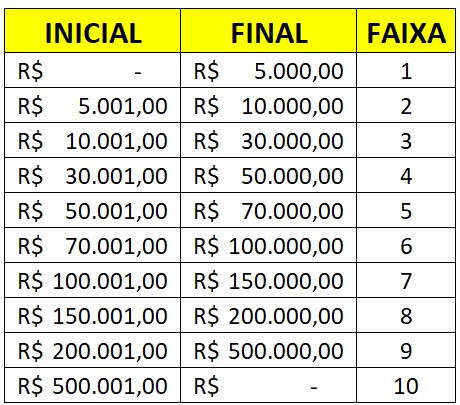

In [19]:
cnpj_final['capital_social_faixas']=pd.cut(

   cnpj_final['capital_social'],

   bins=[-1, 5000, 10000, 30000, 50000, 70000, 100000, 150000, 200000, 500000, sys.maxsize],

   labels=['1', '2', '3', '4', '5','6','7','8','9','10']
)

**4) codigo_situacao_cadastral e motivo_situacao_cadastral**  



*   codigo_situacao_cadastral : indica a situação cadastral da empresa. Como a finalidade do trabalho em questão é a identificação das empresas que fecharam no período e o impacto nas empresas abertas, selecionaremos somente as empresas com situação cadastral (2) - ATIVA e (8) - BAIXADA.
*   motivo_situacao_cadastral : respresenta o motivo pelo qual a situação cadastral da empresa sofreu alteração. Como o foco deste estudo baseia-se na análise das empresas fechadas e abertas no período, o motivo é irrelevante e, portanto, a coluna será eliminada.

**5) data_inicio_atividade, data_situacao_cadastral,  situacao_cadastral_modelo**


*   data_inicio_atividade : É a data inicial do CNPJ, data em que a empresa foi constituída. Essa data, no caso das empresas que possuem a situação cadastral (2) - ATIVA, é a mesma da data_situacao_cadstral. Não iremos fazer nenhuma ação nesta coluna pois a seleção será feita na data_situacao_cadastral (que representa a data em que a situação cadastral foi alterada).
*   data_situacao_cadastral : representa a data em que houve a última alteração da situação cadastral, ou seja, no caso da situação cadastral (2) - ATIVA, é a mesma da data de abertura da empresa e no caso da situação cadastral (8) - BAIXADA, é a data em que ocorreu o encerramento do CNPJ.
*   situacao_cadastral_modelo : é a coluna target do nosso modelo de aprendizagem.

**6) codigo_ibge, codigo_municipio_siafi,  descricao_municipio,  regiao,  estado,**




*   codigo_ibge : código utilizado pela maioria das tabelas para identificar o 
Munípio brasileiro alvo das informações. Será utilizado para o join dos dados entre as tabelas.
*   codigo_municipio_siafi : código utilizado pela Receita Federal do Brasil para identificar o Município na tabela de Dados Públicos de CNPJ. Durante o trabalho de transformação dos dados, o mesmo foi relacionado e substituído pelo Código do IBGE (utilizado nas demais tabelas incorporadas). Será eliminada.
*   descricao_municipio : nome do Município brasileiro
*   regiao : nome da Região a qual pertence o Município
*   estado : nome do Estado ao qual pertence o Município

# **7) COVID**


Dados obtidos no site: https://covid.saude.gov.br demonstrando o acumulado de casos e mortes por COVID. O primeiro caso de COVID registrado no Brasil se deu em 26/02/2020. Já o computo de casos por município começou timidamente em 27/03/2020. Dessa forma, consideramos para o nosso estudo o dia 01/04/2020, data em que todos os municípios começaram a informar os casos registrados em suas localidades.

Para um melhor estudo do impacto da COVID no fechamento das empresas, realizamos um corte no dataset considerando a data da situação cadastral como delimitador do prazo. No total, estamos avaliando 28 meses de atividade, divididos da seguinte forma:


1.   Período 20-21 - COM COVID (14 meses) - Início: 01/04/2020 - Término: 31/05/2021
2.   Período 19-20 - SEM COVID (14 meses) - Início: 01/02/2019 - Término: 31/03/2020

Os valores constantes nos campos de COVID abaixo seguirão a seguinte determinação:
*   CNPJ´s FECHADOS (situação cadstral igual a "8"): as empresas fechadas no período de 28 meses receberão o valor correspondente de COVID na da data de fechamento da empresa. Ou seja, empresas dentro do período de COVID receberão o valor correspondente ao acumulado no dia do seu fechamento e, caso seja fora do período de COVID, o valor zero (0).
*   CNPJ´s ABERTOS (situação cadstral igual a "2"): as empresas que permenceram ABERTAS durante todo o período receberão nos campos COVID o valor acumulado até o dia 31/05/2021, data de corte do estudo.

      .
   
   


**COLUNAS** 
*   casosAcumulado_covid : número acumulado de casos de COVID no Município até a data de encerramento do CNPJ ou da data de corte em 31/05/2021 para as empresas ainda abertas
*   obitosAcumulado_covid : número acumulado de óbitos por COVID no Município até a data de encerramento do CNPJ ou da data de corte em 31/05/2021 para as empresas ainda abertas
*   casos_acumulados_porcentagem_covid : percentual do acumulado de casos de COVID pelo total de habitantes do Município
*   obitos_acumulados_porcentagem_covid : percentual do acumulado de casos de óbitos por COVID pelo total de habitantes do Município.

Devido a alta cardinalidade (número de elementos deste conjunto) dos dados, as colunas "casos_acumulados_porcentagem_covid" e "obitos_acumulados_porcentagem_covid" serão transformadas duas outras colunas com faixas de valores, conforme tabela abaixo:

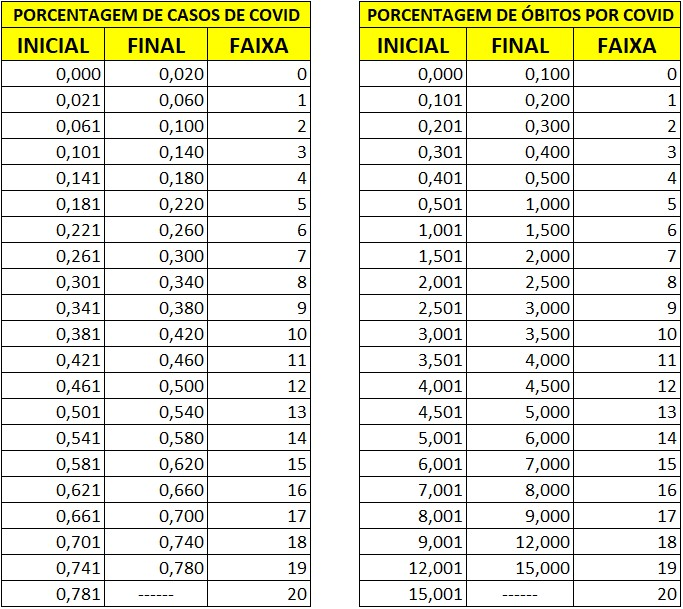

In [20]:
cnpj_final['casos_acumulados_porcentagem_covid_faixas']=pd.cut(
   cnpj_final['casos_acumulados_porcentagem_covid'],
   bins=[-1, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 15.0, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

cnpj_final['obitos_acumulados_porcentagem_covid_faixas']=pd.cut(
   cnpj_final['obitos_acumulados_porcentagem_covid'],
   bins=[-1, 0.02, 0.06, 0.1, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38, 0.42, 0.46, 0.5, 0.54, 0.58, 0.62, 0.66, 0.7, 0.74, 0.78, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

**8) IDH DO MUNICIPIO, IDHM EDUCACAO DO MUNICIPIO, IDHM LONGEVIDADE DO MUNICIPIO e IDHM RENDA DO MUNICIPIO**



*   IDH DO MUNICIPIO : O Índice de Desenvolvimento Humano (IDH) é uma unidade de medida utilizada para aferir o grau de desenvolvimento de uma determinada sociedade nos quesitos de educação, saúde e renda.
O IDH é uma referência numérica que varia entre 0 e 1. Quanto mais próximo de zero, menor é o indicador para os quesitos de saúde, educação e renda. Quanto mais próximo de 1, melhores são as condições para esses quesitos.


*   IDHM EDUCACAO DO MUNICIPIO : O indicador educação refere-se à quantidade média de anos de estudo de uma população. Entende-se que, quanto maior for o tempo de permanência de uma população na escola, melhores serão as chances de desenvolvimento para esse país.
*   IDHM LONGEVIDADE DO MUNICIPIO : Na variável saúde, avalia-se basicamente a taxa de expectativa de vida dos cidadãos de cada país participante. Entende-se que, quanto maior for essa taxa, melhores serão as condições de vida de seus habitantes.
*   IDHM RENDA DO MUNICIPIO : No quesito renda, mede-se o valor médio do rendimento dos cidadãos com base na média do Produto Interno Bruto (PIB), que é a soma de toda a riqueza produzida por um país em determinado período (normalmente anual) dividida pelo número de habitantes.

Devido a alta cardinalidade (número de elementos deste conjunto) dos dados, essa coluna será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

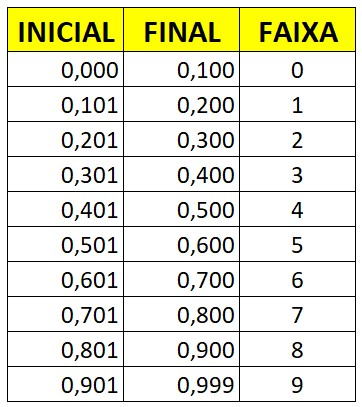






In [21]:
cnpj_final['idh_municipios_faixas']=pd.cut(
   cnpj_final['IDH DO MUNICIPIO'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_educacao_municipios_faixas']=pd.cut(
   cnpj_final['IDHM EDUCACAO DO MUNICIPIO'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_longevidade_municipios_faixas']=pd.cut(
   cnpj_final['IDHM LONGEVIDADE DO MUNICIPIO'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final['idh_renda_municipios_faixas']=pd.cut(
   cnpj_final['IDHM RENDA DO MUNICIPIO'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**9) populacaoTCU2019, PIB,  PIB PER CAPITA**



*   populacaoTCU2019 : estimativa do número de habitantes do Município no Censo realizado pelo IBGE no ano de 2019
*   PIB : PIB Municipal: Indicador que consolida as informações da atividade econômica dos municípios. O principal objetivo do PIB Municipal é demonstrar a dinâmica e a performance econômica do município, a partir da consolidação de um conjunto de informações relativas a todos os segmentos produtivos.
*   PIB PER CAPITA : Valor do PIB municipal per capita, calculado como sendo o PIB Municipal do ano dividido pela população do mesmo ano. Os valores são apresentados em reais correntes, não sendo aplicado nenhum deflator ou fator de correção.

Devido a alta cardinalidade (número de elementos deste conjunto) dos dados, a coluna "PIB PER CAPITA" será transformada em uma coluna com faixas de valores, conforme tabela abaixo:

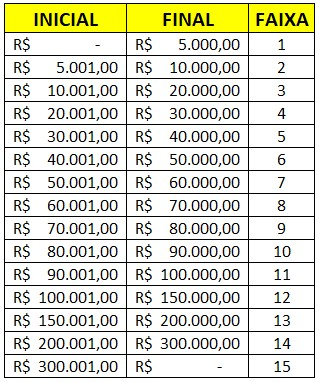




In [22]:
cnpj_final['pib_per_capita_faixas']=pd.cut(

   cnpj_final['PIB PER CAPITA'],

   bins=[-1, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 300000, sys.maxsize],

   labels=['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15']
)

**10) cnae_principal,  cnae_divisao,  cnae_secao_numero,  cnae_secao,  cnae_descricao**  

A CNAE é a classificação de atividades econômicas oficialmente adotada pelo Sistema Estatístico Nacional
e pelos órgãos gestores de cadastros e registros da Administração Pública do país.
A CNAE é uma classificação hierarquizada em cinco níveis – seções, divisões, grupos, classes e subclasses.
O quinto nível, o de subclasses, corresponde ao detalhamento usado para a identificação econômica das
unidades de produção, normalmente constituídas como pessoa jurídica ou profissionais autônomos, em
cadastros e registros da Administração Pública, nas três esferas de governo.

*   cnae_principal : representa a subclasse da classificação. A coluna será eliminada pois representa um número elevado de itens na sua classificação. Optamos pela utilização da classificação baseada na Seção.
Todavia, ao analisarmos o gráfico com o agrupamento por seção, identificamos duas categorias com alto número de ocorrências: "COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS" e "OUTRAS ATIVIDADES DE SERVIÇOS". Analisando detalhadamente os dois grupos, observações incoerrências no último. Conforme demonstrado na tabela de agrupamento de CNAE´s e no gráfico desse agrupamento, o CNAE Principal "9492800" (Atividades de organizações políticas) será eliminado pois não caracteriza empresas "DE FATO", objeto deste trabalho. O segundo CNAE com maior número de fechamentos (4781400), representa o setor "Comércio varejista de artigos do vestuário e acessórios", será mantido pois é alvo deste estudo. Por outro lado, conforme analisado abaixo, não houve discrepânicas nos CNAE´s da empresas abertas no período, pois o CNAE com maior abertura foi o CNAE Principal "4781400" (Comércio varejista de artigos do vestuário e acessórios), alvo deste estudo.
*   cnae_divisao : representa a divisão na classificação CNAE.
*   cnae_secao_numero : representação numérica da classificação da seção do CNAE que é em letras.
*   cnae_secao : representa a seção na classificação CNAE a qual pertence o CNPJ. É composto por 21 seções, nível mais elevado da classificação CNAE, o qual será considerado no nosso estudo para observar o impacto do COVID em setores da economia.
*   cnae_descricao : descrição da seção em análise.

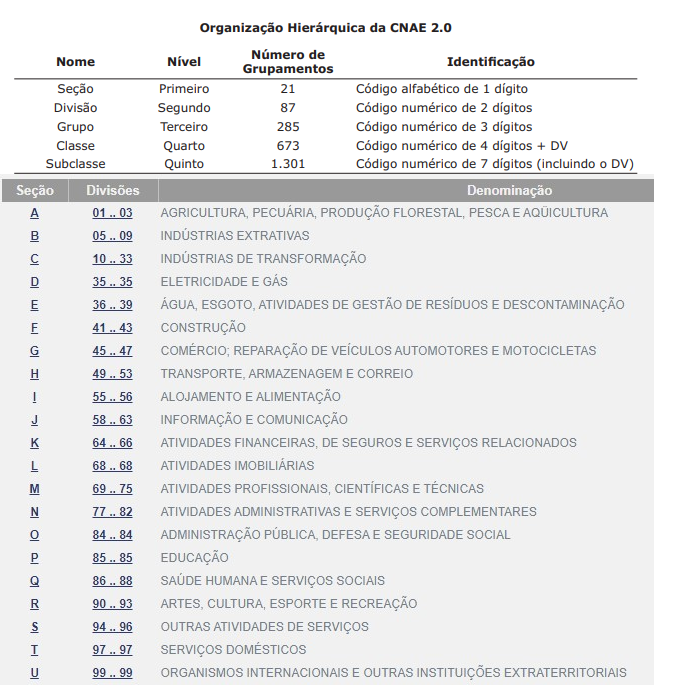

**10.1) CNAE - ANÁLISE DAS EMPRESAS FECHADAS NO PERÍODO**

In [30]:
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral=="08"') # Tabela somente com os dados de empresas fechadas no período

In [31]:
cnae=cnpj_final_fechadas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [32]:
cnae = cnae.sort_values(ascending=False)

In [33]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           945971
OUTRAS ATIVIDADES DE SERVIÇOS                                        742600
ALOJAMENTO E ALIMENTAÇÃO                                             286946
INDÚSTRIAS DE TRANSFORMAÇÃO                                          224239
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                 187709
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                     180403
TRANSPORTE, ARMAZENAGEM E CORREIO                                    180262
CONSTRUÇÃO                                                           165190
EDUCAÇÃO                                                             110072
INFORMAÇÃO E COMUNICAÇÃO                                              79213
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       54938
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        42775
ARTES, CULTURA, ESPORTE E RECREAÇÃO                                   307

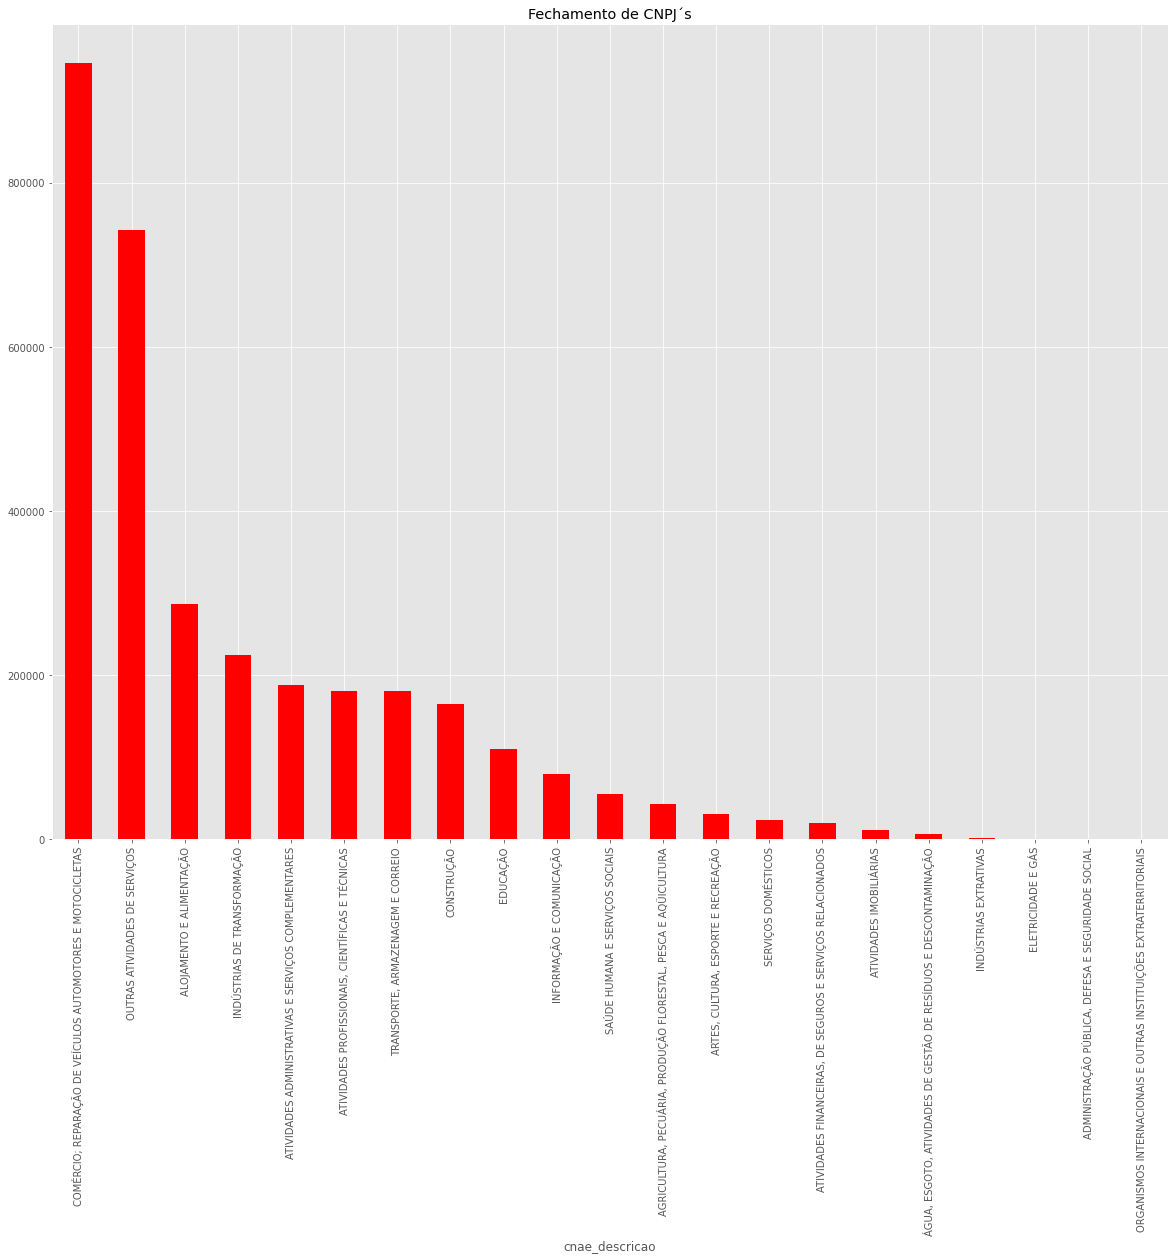

In [34]:
cnae.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

In [35]:
cnae=cnpj_final_fechadas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [36]:
cnae = cnae.sort_values(ascending=False)

In [37]:
cnae_maiores = cnae [0:30]

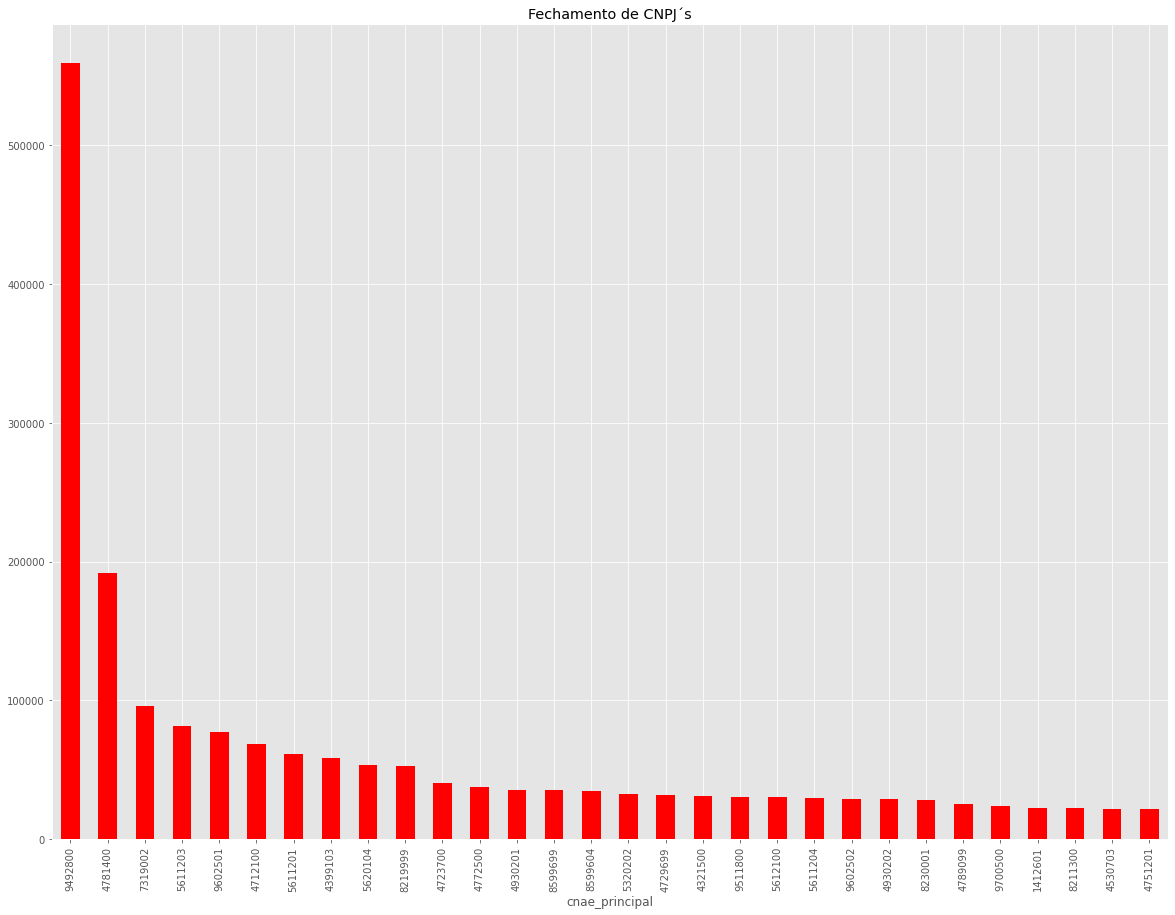

In [38]:
cnae_maiores.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

**10.2) CNAE - ANÁLISE DAS EMPRESAS ABERTAS NO PERÍODO**

In [39]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral=="02"') # Tabela somente com os dados de empresas fechadas no período

In [40]:
cnae=cnpj_final_abertas_total.groupby('cnae_descricao')['cnae_descricao'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [41]:
cnae = cnae.sort_values(ascending=False)

In [42]:
cnae

cnae_descricao
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           2155737
OUTRAS ATIVIDADES DE SERVIÇOS                                         814329
ALOJAMENTO E ALIMENTAÇÃO                                              801567
INDÚSTRIAS DE TRANSFORMAÇÃO                                           662225
TRANSPORTE, ARMAZENAGEM E CORREIO                                     614224
CONSTRUÇÃO                                                            613727
ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS                      534939
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                  487761
EDUCAÇÃO                                                              290665
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                       216441
INFORMAÇÃO E COMUNICAÇÃO                                              191736
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA        119439
SERVIÇOS DOMÉSTICOS                                          

In [43]:
cnae=cnpj_final_abertas_total.groupby('cnae_principal')['cnae_principal'].count() # Agrupamento de CNAE´s principais para identificação de possíveis disparidades

In [44]:
cnae = cnae.sort_values(ascending=False)

In [45]:
cnae_maiores = cnae [0:30]

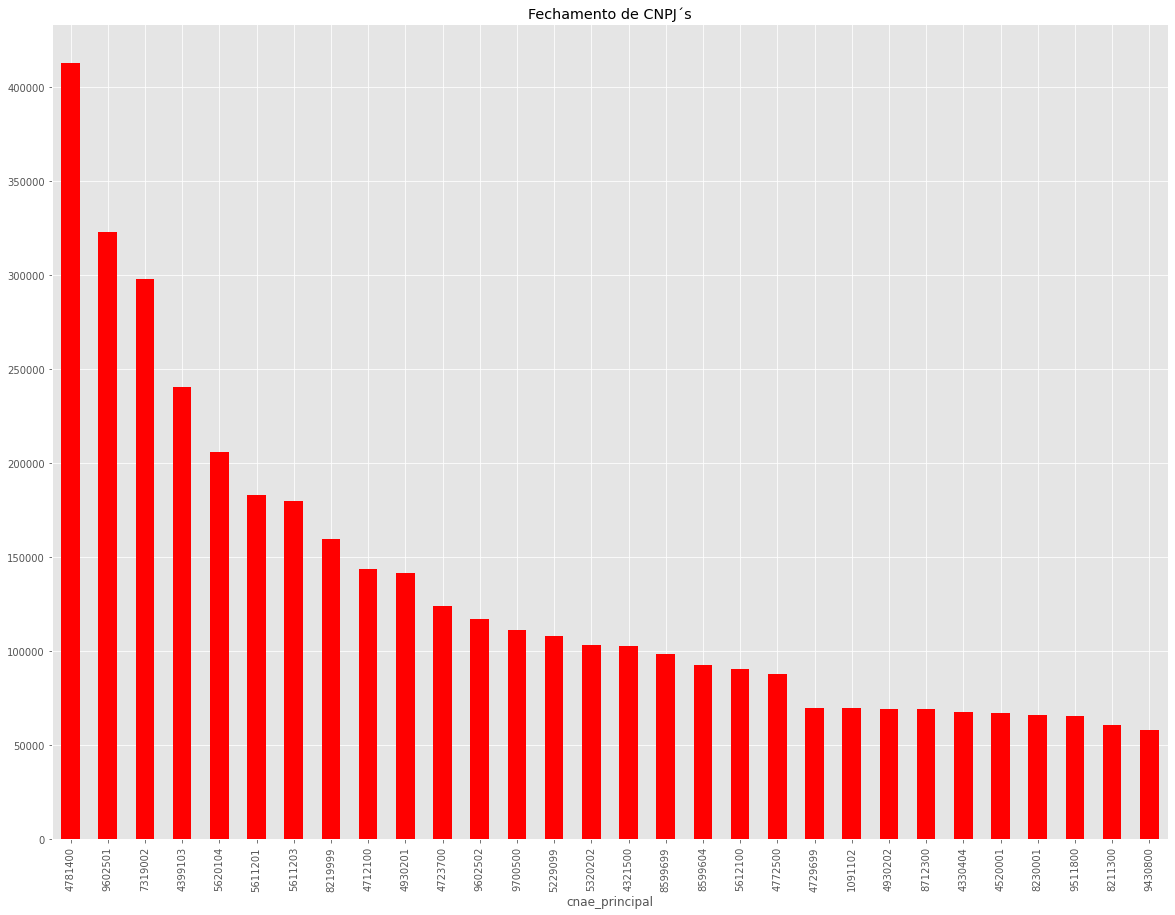

In [46]:
cnae_maiores.plot(kind='bar', figsize=(20,15), color='r', title='Fechamento de CNPJ´s')

In [49]:
cnpj_final = cnpj_final[cnpj_final.cnae_principal != '9492800']  # Após análise, eliminar as linhas onde o CNAE Principal é igual a "9492800" -  "Atividades de organizações políticas"

In [51]:
cnpj_final = cnpj_final.drop(['motivo_situacao_cadastral','codigo_municipio_siafi'], axis=1) #eliminação das colunas desnecessárias

In [52]:
cnpj_final.shape

(10534042, 37)

...

...

## **ANALISE EXPLORATÓRIA DO FECHAMENTO E ABERTURA DAS EMPRESAS**

In [53]:
cnpj_final['data_situacao_cadastral_ano_mes'] = pd.DataFrame (cnpj_final['data_situacao_cadastral'].map(lambda x: str(x)[:-2])) # Criação da coluna contendo o ano e mês da ocorrência da mudança da situação cadastral

In [54]:
cnpj_final = cnpj_final[[
    'cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial',  'capital_social', 'capital_social_faixas',
    'codigo_situacao_cadastral',  
    'data_inicio_atividade', 'data_situacao_cadastral',  'data_situacao_cadastral_ano_mes', 'situacao_cadastral_modelo',
    'codigo_ibge', 'descricao_municipio',  'regiao',  'estado',
    'casosAcumulado_covid',  'obitosAcumulado_covid',  'casos_acumulados_porcentagem_covid',  'obitos_acumulados_porcentagem_covid', 'casos_acumulados_porcentagem_covid_faixas',  'obitos_acumulados_porcentagem_covid_faixas',
    'IDH DO MUNICIPIO',  'IDHM EDUCACAO DO MUNICIPIO',  'IDHM LONGEVIDADE DO MUNICIPIO', 'IDHM RENDA DO MUNICIPIO', 'idh_municipios_faixas','idh_educacao_municipios_faixas','idh_longevidade_municipios_faixas','idh_renda_municipios_faixas',
    'populacaoTCU2019', 'PIB',  'PIB PER CAPITA', 'pib_per_capita_faixas',
    'cnae_principal',  'cnae_divisao',  'cnae_secao_numero',  'cnae_secao',  'cnae_descricao'
]]


**CRIAÇÃO DAS TABELAS PARA PESQUISA:**

*   cnpj_final_abertas_total - TABELA COM TODAS AS EMPRESAS ABERTAS NO PERÍODO DE 28 MESES
*   cnpj_final_fechadas_total - TABELA COM TODAS AS EMPRESAS FECHADAS NO PERÍODO DE 28 MESES


*   cnpj_final_fechadas_com_covid - TABELA COM TODAS AS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE 14 MESES DE COVID - 01/04/2020 a 31/05/2021
*   cnpj_final_fechadas_sem_covid - TABELA COM TODAS AS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE 14 MESES SEM COVID - 01/02/2019 a 31/03/2020
*   cnpj_final_abertas_com_covid - TABELA COM TODAS AS EMPRESAS QUE ABRIRAM DURANTE O PERÍODO DE 14 MESES DE COVID - 01/04/2020 a 31/05/2021
*   cnpj_final_abertas_sem_covid - TABELA COM TODAS AS EMPRESAS QUE ABRIRAM DURANTE O PERÍODO DE 14 MESES SEM COVID - 01/02/2019 a 31/03/2020



In [55]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral=="02"')
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral=="08"')

In [56]:
cnpj_final_fechadas_com_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= "20200401" and data_situacao_cadastral <= "20210531" ')
cnpj_final_fechadas_sem_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= "20190201" and data_situacao_cadastral <= "20200331" ')
cnpj_final_abertas_com_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= "20200401" and data_situacao_cadastral <= "20210531" ')
cnpj_final_abertas_sem_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= "20190201" and data_situacao_cadastral <= "20200331" ')

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR MÊS**

In [58]:
cnpj_final_abertas_total_graf_data = cnpj_final_abertas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()
cnpj_final_fechadas_total_graf_data = cnpj_final_fechadas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()

In [59]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_data))
r2 = [x+barWidth for x in r1]

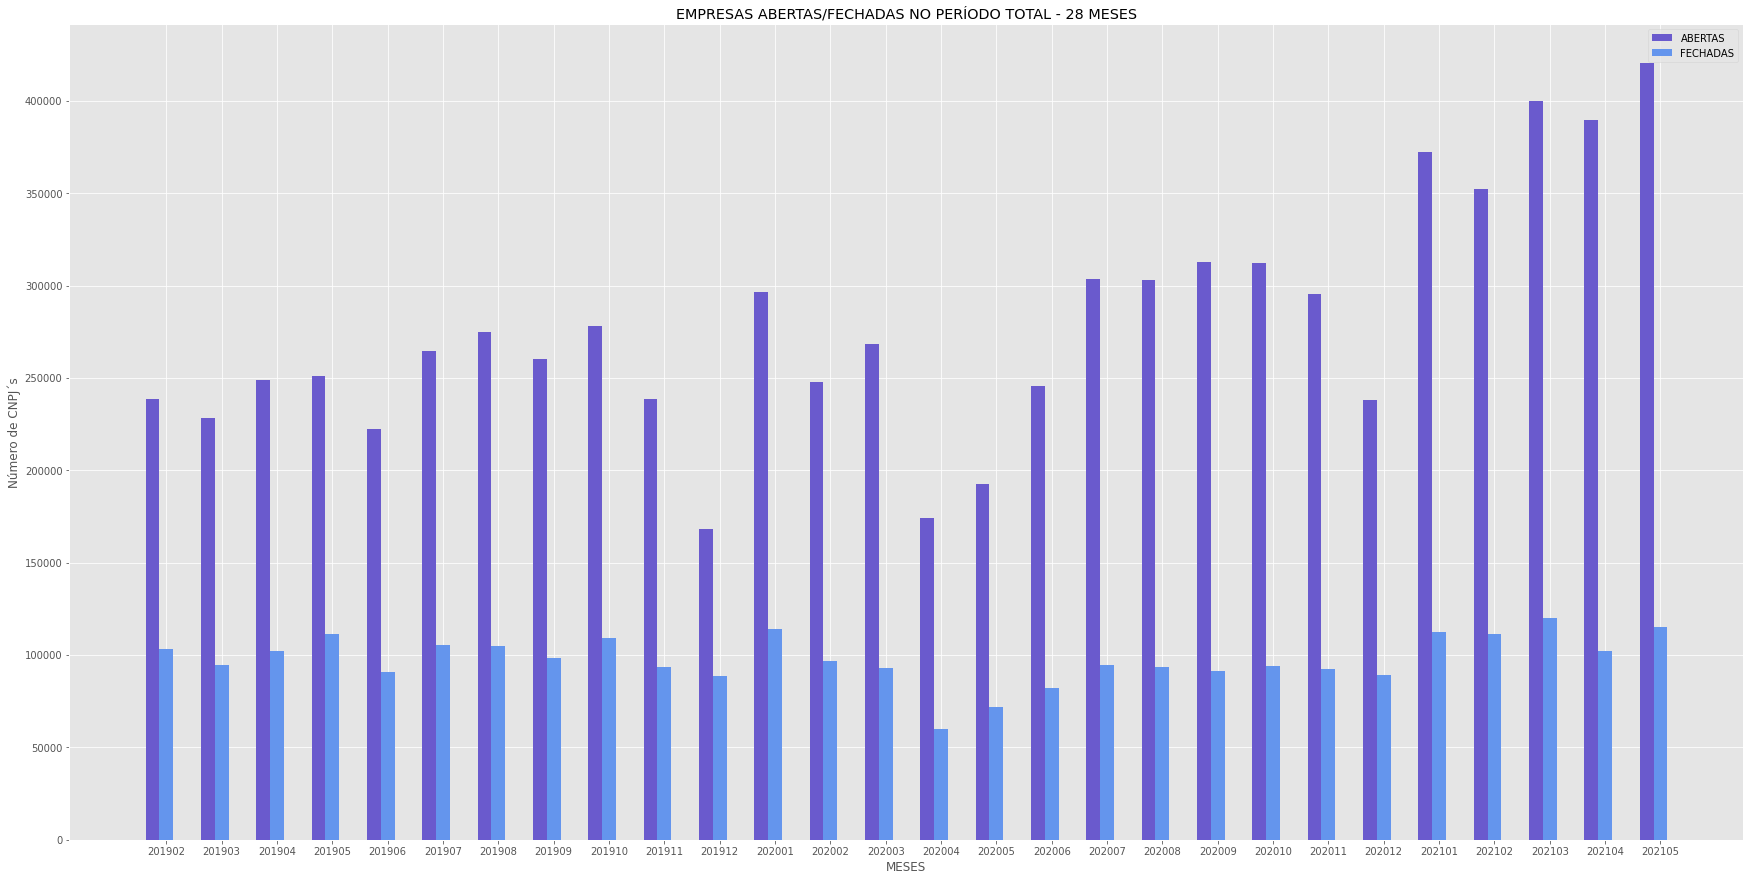

In [60]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_data, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_data, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('MESES')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_data))], cnpj_final_abertas_total_graf_data.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()

In [61]:
cnpj_abertas_fechadas_graf_data = pd.concat([cnpj_final_abertas_total_graf_data, cnpj_final_fechadas_total_graf_data], axis=1)
cnpj_abertas_fechadas_graf_data.columns = ['empresas_abertas', 'empresas_fechadas']

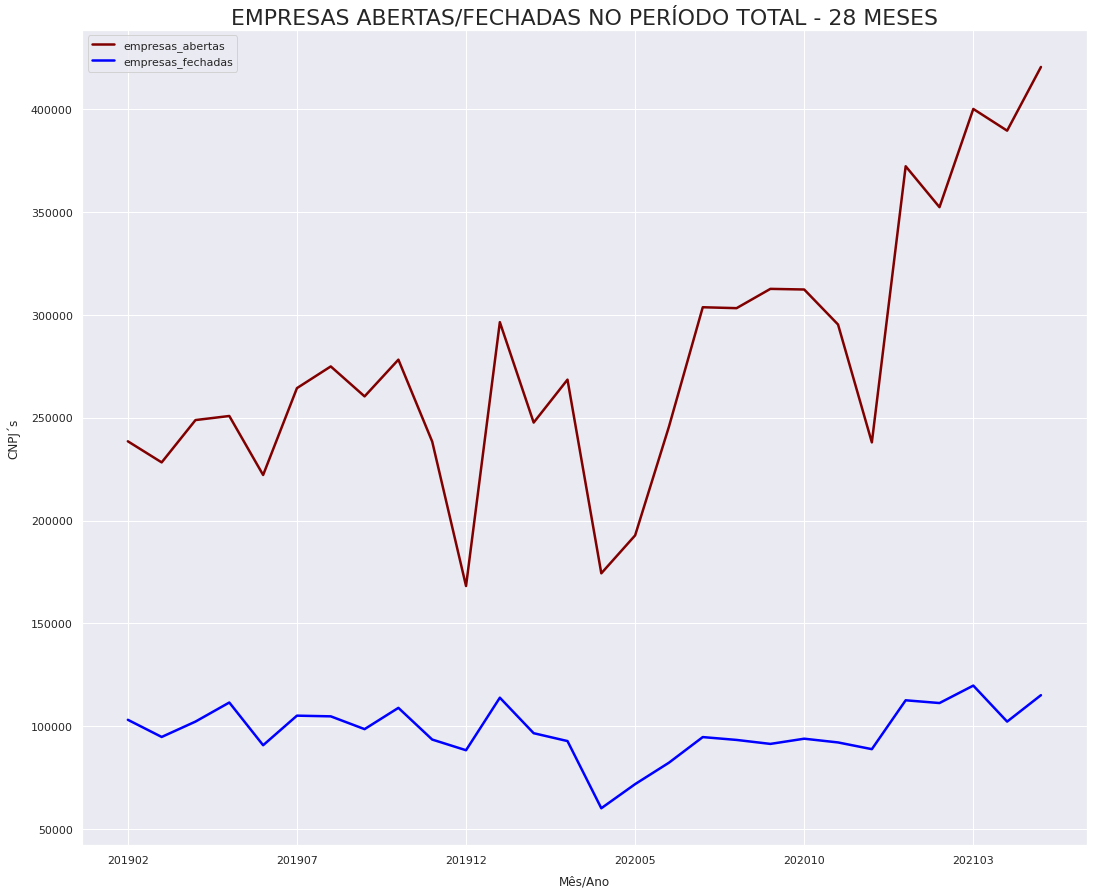

In [62]:
sns.set(font_scale=1)
cnpj_abertas_fechadas_graf_data.plot(figsize=(18, 15), linewidth=2.5, color=['maroon','blue'])
plt.xlabel("Mês/Ano", labelpad=10)
plt.ylabel("CNPJ´s", labelpad=10)
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES", y=1, fontsize=22);

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR CNAE**

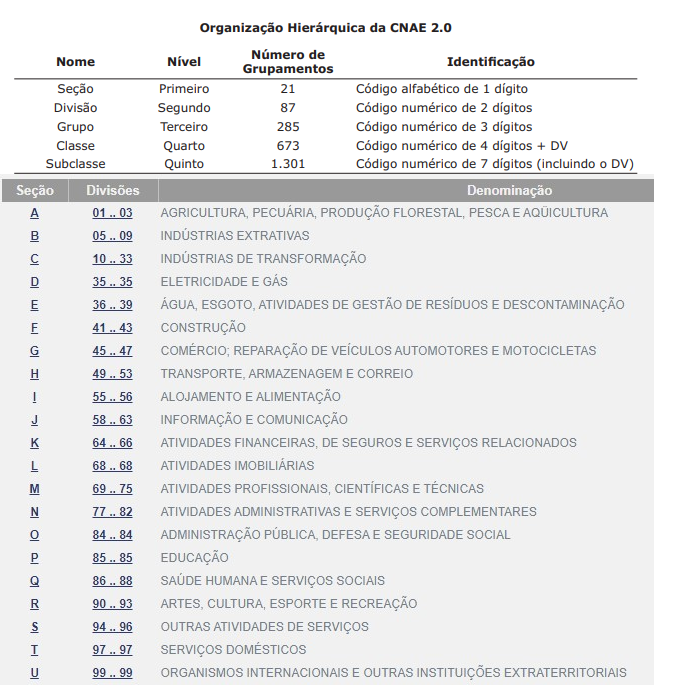

In [63]:
cnpj_final_abertas_total_graf_cnae = cnpj_final_abertas_total.groupby('cnae_secao')['cnae_secao'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_cnae = cnpj_final_fechadas_total.groupby('cnae_secao')['cnae_secao'].count().sort_values(ascending=False)

In [64]:
cnpj_abertas_fechadas_graf_cnae = pd.concat([cnpj_final_abertas_total_graf_cnae, cnpj_final_fechadas_total_graf_cnae], axis=1)
cnpj_abertas_fechadas_graf_cnae.columns = ['empresas_abertas', 'empresas_fechadas']

In [65]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_cnae))
r2 = [x+barWidth for x in r1]

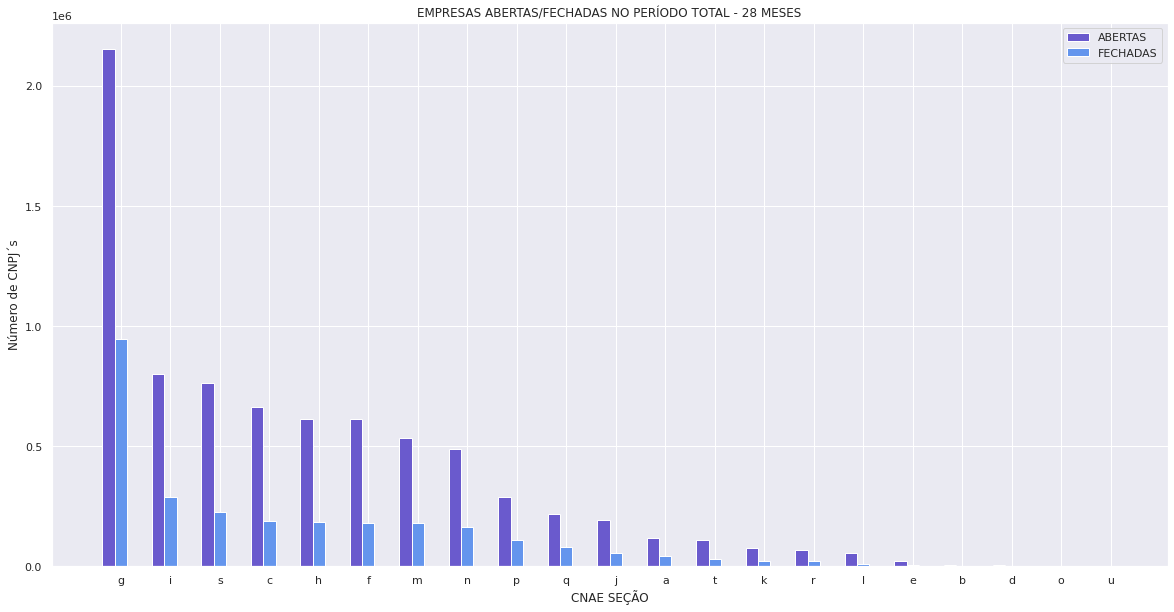

In [66]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_cnae, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_cnae, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('CNAE SEÇÃO')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_cnae))], cnpj_final_abertas_total_graf_cnae.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR IDH**

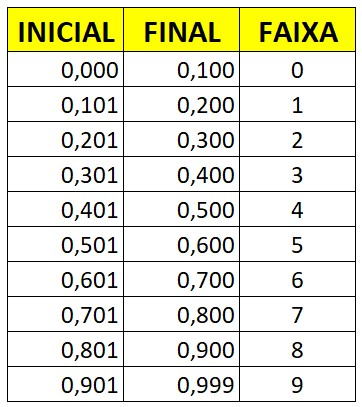

In [67]:
cnpj_final_abertas_total_graf_idh = cnpj_final_abertas_total.groupby('idh_municipios_faixas')['idh_municipios_faixas'].count()
cnpj_final_fechadas_total_graf_idh = cnpj_final_fechadas_total.groupby('idh_municipios_faixas')['idh_municipios_faixas'].count()

In [68]:
cnpj_final_abertas_total_graf_idh_edu = cnpj_final_abertas_total.groupby('idh_educacao_municipios_faixas')['idh_educacao_municipios_faixas'].count()
cnpj_final_fechadas_total_graf_idh_edu = cnpj_final_fechadas_total.groupby('idh_educacao_municipios_faixas')['idh_educacao_municipios_faixas'].count()

In [69]:
cnpj_final_abertas_total_graf_idh_long = cnpj_final_abertas_total.groupby('idh_longevidade_municipios_faixas')['idh_longevidade_municipios_faixas'].count()
cnpj_final_fechadas_total_graf_idh_long = cnpj_final_fechadas_total.groupby('idh_longevidade_municipios_faixas')['idh_longevidade_municipios_faixas'].count()

In [70]:
cnpj_final_abertas_total_graf_idh_renda = cnpj_final_abertas_total.groupby('idh_renda_municipios_faixas')['idh_renda_municipios_faixas'].count()
cnpj_final_fechadas_total_graf_idh_renda = cnpj_final_fechadas_total.groupby('idh_renda_municipios_faixas')['idh_renda_municipios_faixas'].count()

***ABRIRAM POR IDH***

In [71]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_idh))
r2 = [x+barWidth for x in r1]
r3 = [x+barWidth for x in r2]
r4 = [x+barWidth for x in r3]

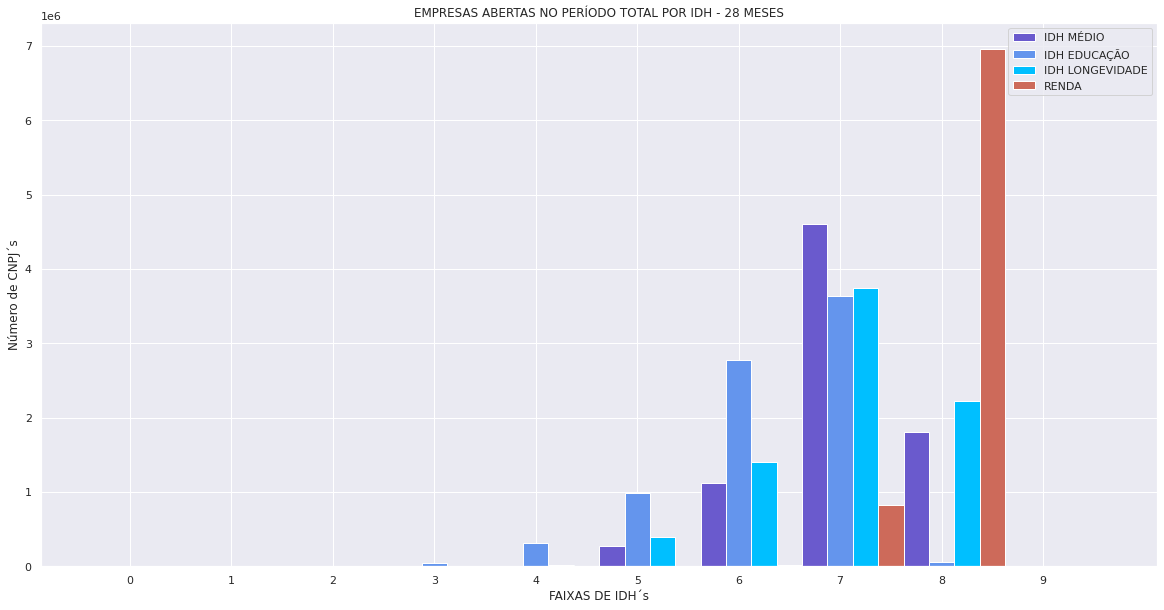

In [72]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_idh, color='#6A5ACD', width=barWidth, label='IDH MÉDIO')
plt.bar(r2, cnpj_final_abertas_total_graf_idh_edu, color='#6495ED', width=barWidth, label='IDH EDUCAÇÃO')
plt.bar(r3, cnpj_final_abertas_total_graf_idh_long, color='#00BFFF', width=barWidth, label='IDH LONGEVIDADE')
plt.bar(r4, cnpj_final_abertas_total_graf_idh_renda, color='#CD6A5A', width=barWidth, label='RENDA')

plt.xlabel('FAIXAS DE IDH´s')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_idh))], cnpj_final_abertas_total_graf_idh.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS NO PERÍODO TOTAL POR IDH - 28 MESES")


plt.legend()
plt.show()

***FECHARAM POR IDH***

In [73]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_idh))
r2 = [x+barWidth for x in r1]
r3 = [x+barWidth for x in r2]
r4 = [x+barWidth for x in r3]

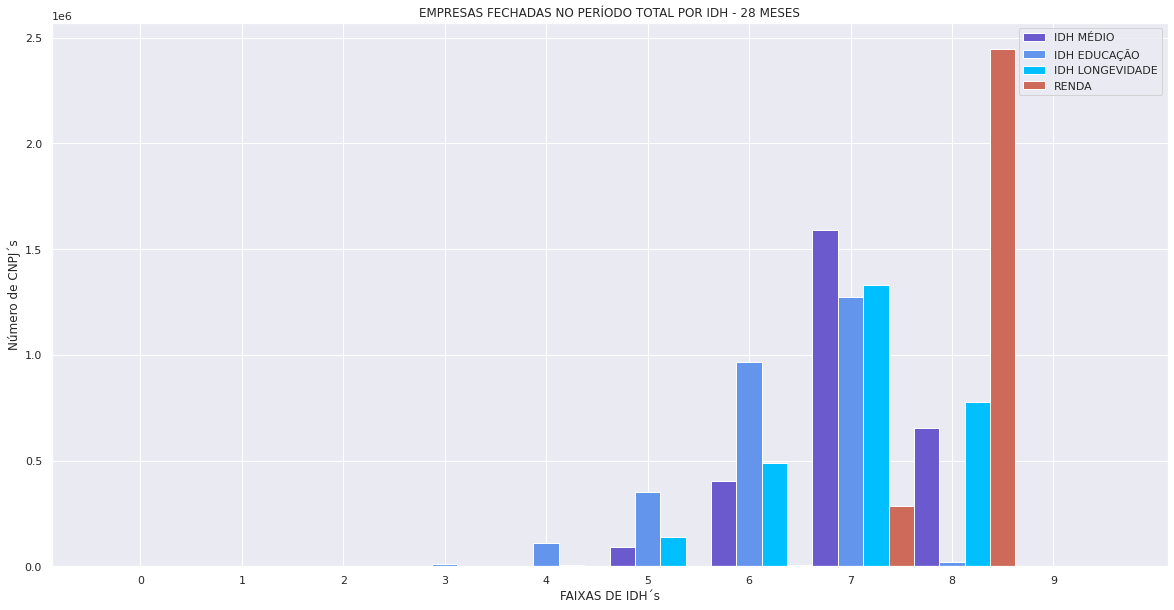

In [74]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_idh, color='#6A5ACD', width=barWidth, label='IDH MÉDIO')
plt.bar(r2, cnpj_final_fechadas_total_graf_idh_edu, color='#6495ED', width=barWidth, label='IDH EDUCAÇÃO')
plt.bar(r3, cnpj_final_fechadas_total_graf_idh_long, color='#00BFFF', width=barWidth, label='IDH LONGEVIDADE')
plt.bar(r4, cnpj_final_fechadas_total_graf_idh_renda, color='#CD6A5A', width=barWidth, label='RENDA')

plt.xlabel('FAIXAS DE IDH´s')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_idh))], cnpj_final_fechadas_total_graf_idh.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO TOTAL POR IDH - 28 MESES")


plt.legend()
plt.show()

***ABRIRAM E FECHARAM POR IDH***

In [75]:
cnpj_abertas_fechadas_graf_idhs = pd.concat([cnpj_final_abertas_total_graf_idh, cnpj_final_fechadas_total_graf_idh,cnpj_final_abertas_total_graf_idh_edu,cnpj_final_fechadas_total_graf_idh_edu,cnpj_final_abertas_total_graf_idh_long,cnpj_final_fechadas_total_graf_idh_long,cnpj_final_abertas_total_graf_idh_renda,cnpj_final_fechadas_total_graf_idh_renda], axis=1)
cnpj_abertas_fechadas_graf_idhs.columns = ['IDH - ABERTAS', 'IDH - FECHADAS','IDH EDUCACAO - ABERTAS', 'IDH EDUCACAO - FECHADAS','IDH LONGEVIDADE - ABERTAS', 'IDH LONGEVIDADE - FECHADAS','IDH RENDA - ABERTAS', 'IDH RENDA - FECHADAS']

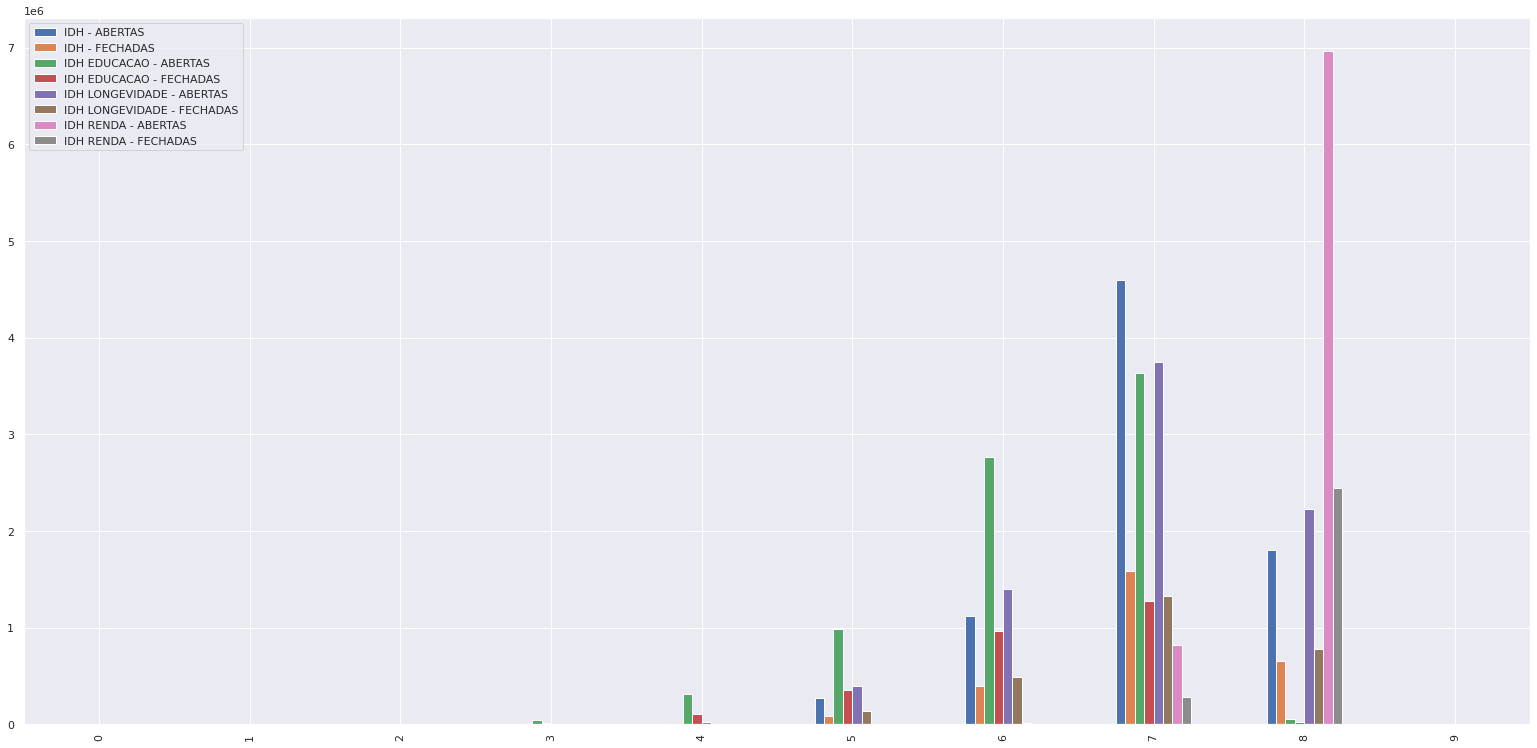

In [76]:
cnpj_abertas_fechadas_graf_idhs.plot(kind="bar",figsize=(27,13))
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR FAIXA DE CAPITAL SOCIAL**

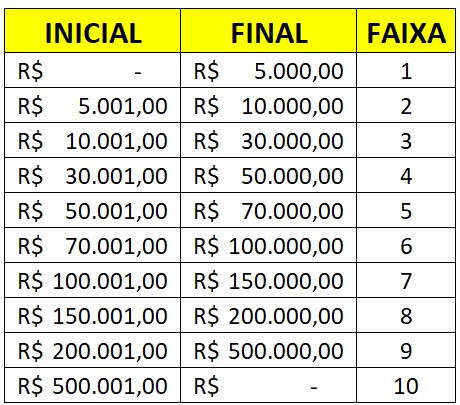

In [77]:
cnpj_final_abertas_total_graf_capital = cnpj_final_abertas_total.groupby('capital_social_faixas')['capital_social_faixas'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_capital = cnpj_final_fechadas_total.groupby('capital_social_faixas')['capital_social_faixas'].count().sort_values(ascending=False)

In [78]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_capital))
r2 = [x+barWidth for x in r1]

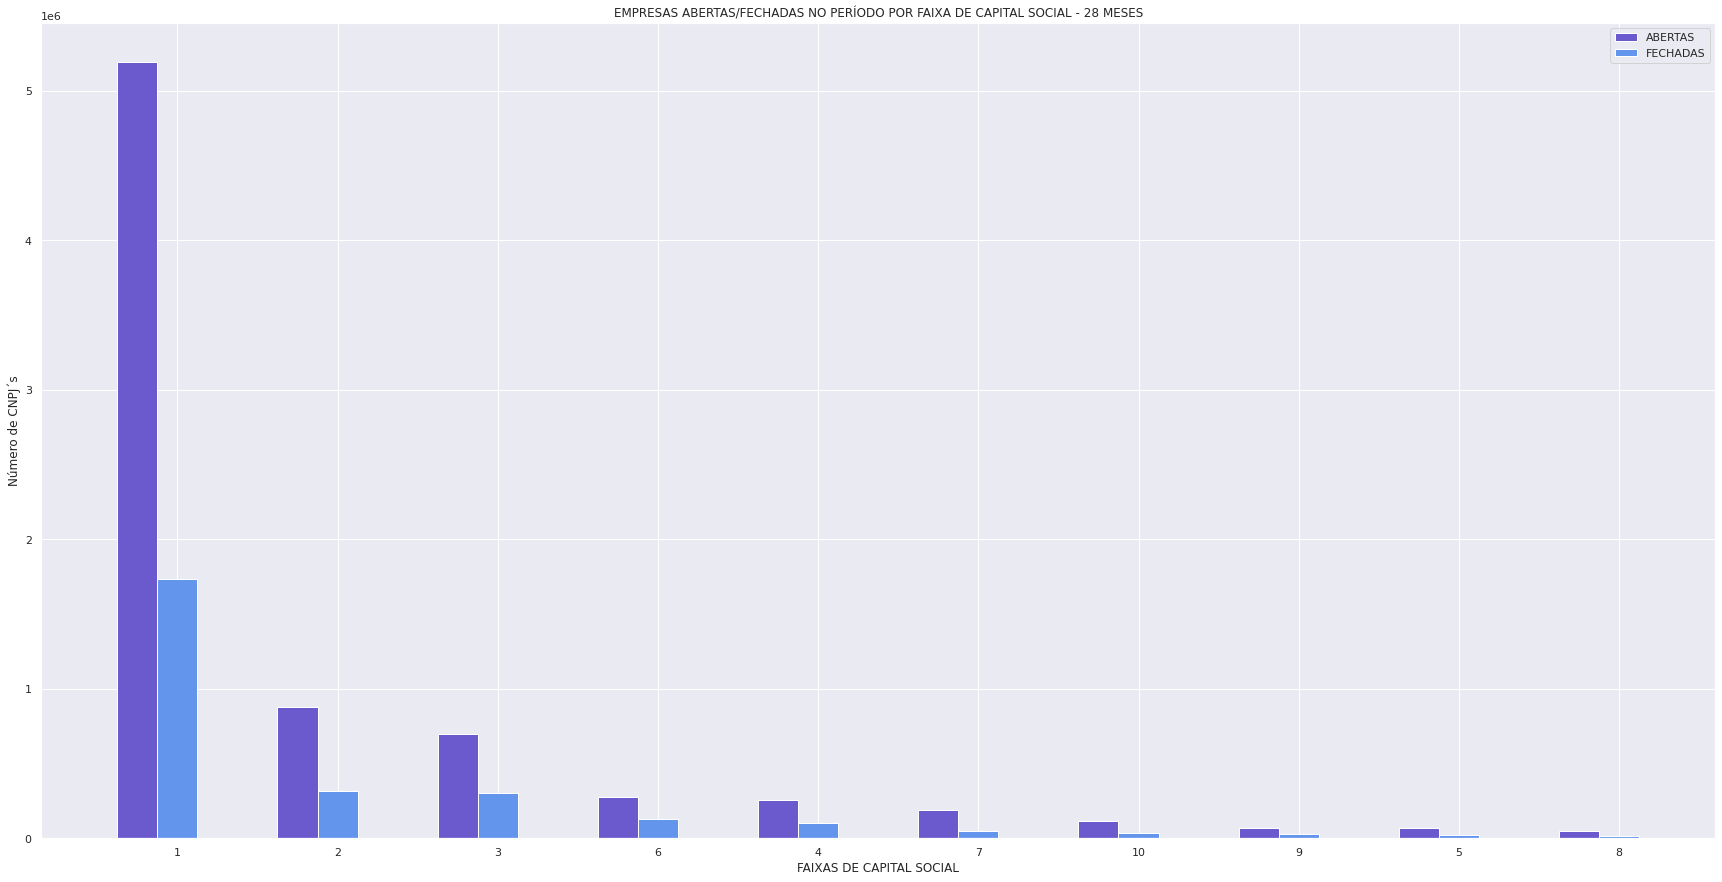

In [79]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_capital, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_capital, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('FAIXAS DE CAPITAL SOCIAL')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_capital))], cnpj_final_abertas_total_graf_capital.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR FAIXA DE CAPITAL SOCIAL - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR MATRIZ OU FILIAL**

In [80]:
cnpj_final_abertas_total_graf_matriz = cnpj_final_abertas_total.groupby('matriz_filial')['matriz_filial'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_matriz = cnpj_final_fechadas_total.groupby('matriz_filial')['matriz_filial'].count().sort_values(ascending=False)

In [81]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_matriz))
r2 = [x+barWidth for x in r1]

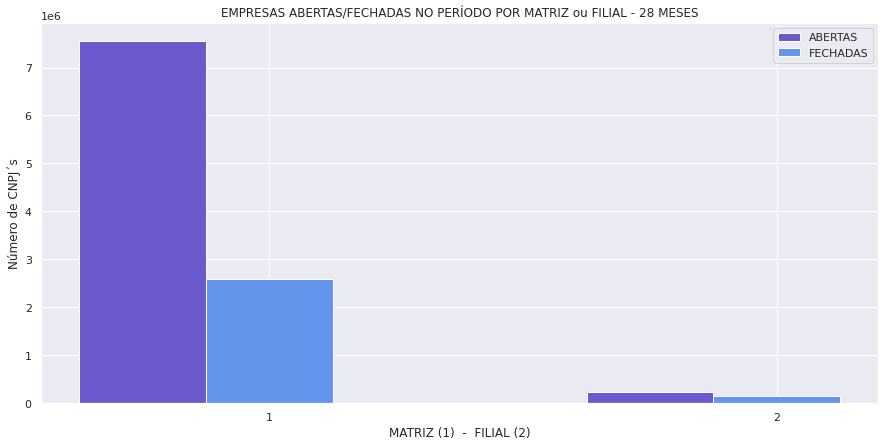

In [82]:
plt.figure(figsize=(15,7))
plt.bar(r1, cnpj_final_abertas_total_graf_matriz, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_matriz, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('MATRIZ (1)  -  FILIAL (2)')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_matriz))], cnpj_final_abertas_total_graf_matriz.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR MATRIZ ou FILIAL - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR REGIÃO**

In [83]:
cnpj_final_abertas_total_graf_regiao = cnpj_final_abertas_total.groupby('regiao')['regiao'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_regiao = cnpj_final_fechadas_total.groupby('regiao')['regiao'].count().sort_values(ascending=False)

In [84]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_regiao))
r2 = [x+barWidth for x in r1]

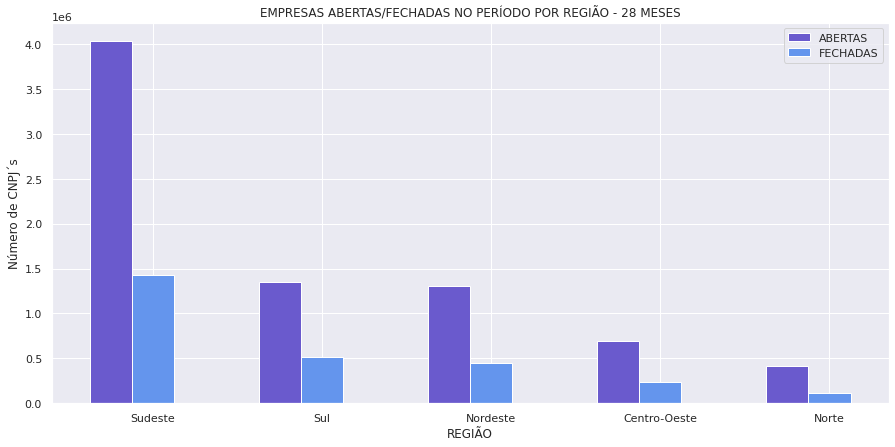

In [85]:
plt.figure(figsize=(15,7))
plt.bar(r1, cnpj_final_abertas_total_graf_regiao, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_regiao, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('REGIÃO')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_regiao))], cnpj_final_abertas_total_graf_regiao.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR REGIÃO - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM POR ESTADO**

In [86]:
cnpj_final_abertas_total_graf_estado = cnpj_final_abertas_total.groupby('estado')['estado'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_estado = cnpj_final_fechadas_total.groupby('estado')['estado'].count().sort_values(ascending=False)

In [87]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_estado))
r2 = [x+barWidth for x in r1]

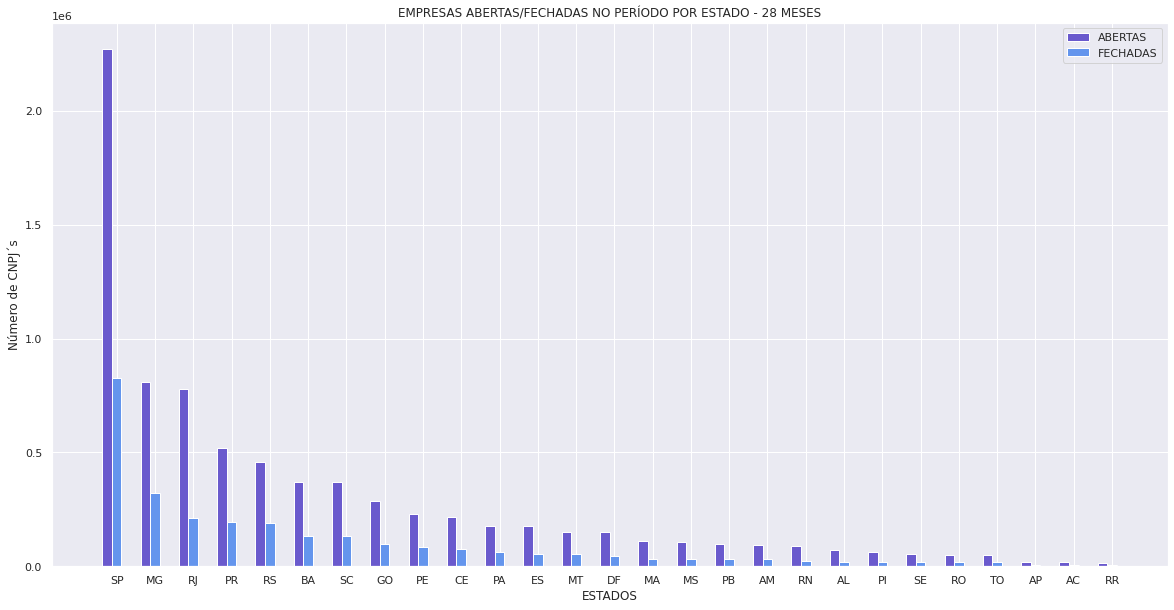

In [88]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_estado, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_estado, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('ESTADOS')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_estado))], cnpj_final_abertas_total_graf_estado.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR ESTADO - 28 MESES")


plt.legend()
plt.show()

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM CONSIDERANDO A QUANTIDADE DE CASOS DE COVID POR FAIXA**

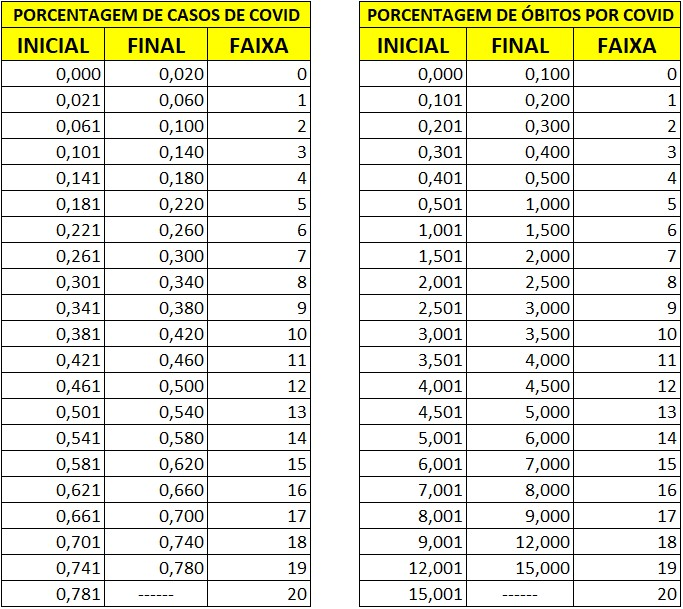

In [89]:
cnpj_final_fechadas_total_graf_com_covid = cnpj_final_fechadas_com_covid.groupby('casos_acumulados_porcentagem_covid_faixas')['casos_acumulados_porcentagem_covid_faixas'].count()
cnpj_final_fechadas_total_graf_covid = cnpj_final_fechadas_total.groupby('casos_acumulados_porcentagem_covid_faixas')['casos_acumulados_porcentagem_covid_faixas'].count()
cnpj_final_abertas_total_graf_covid = cnpj_final_abertas_total.groupby('casos_acumulados_porcentagem_covid_faixas')['casos_acumulados_porcentagem_covid_faixas'].count()

**1) ANÁLISE DE TODAS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE ESTUDO - 28 MESES**

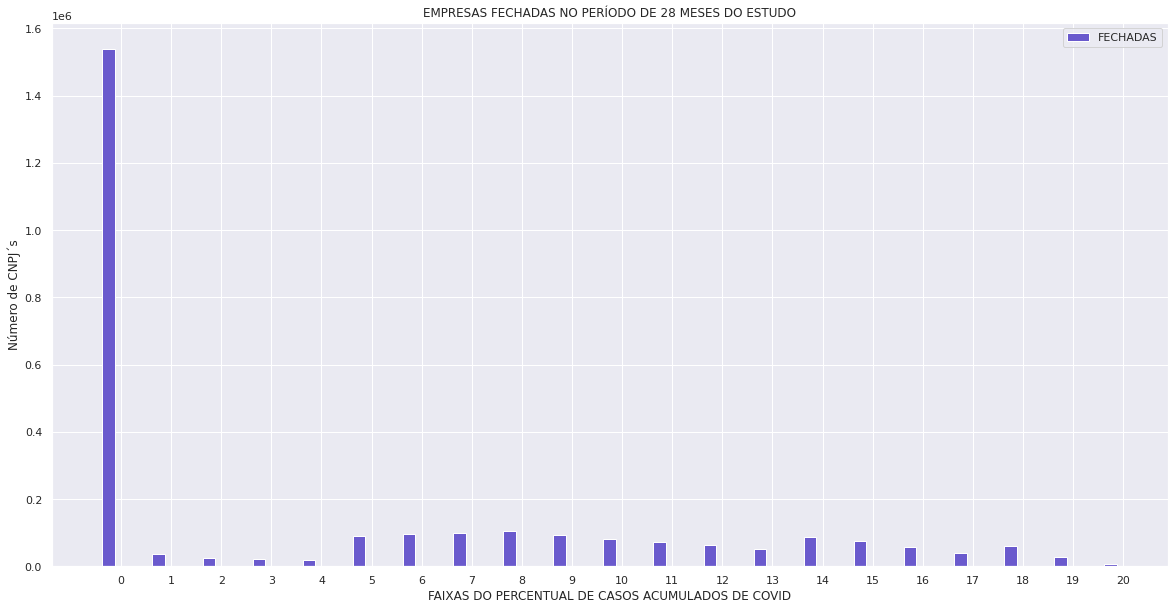

In [90]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_covid))

plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_covid, color='#6A5ACD', width=barWidth, label='FECHADAS')


plt.xlabel('FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_covid))], cnpj_final_fechadas_total_graf_covid.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 28 MESES DO ESTUDO")


plt.legend()
plt.show()

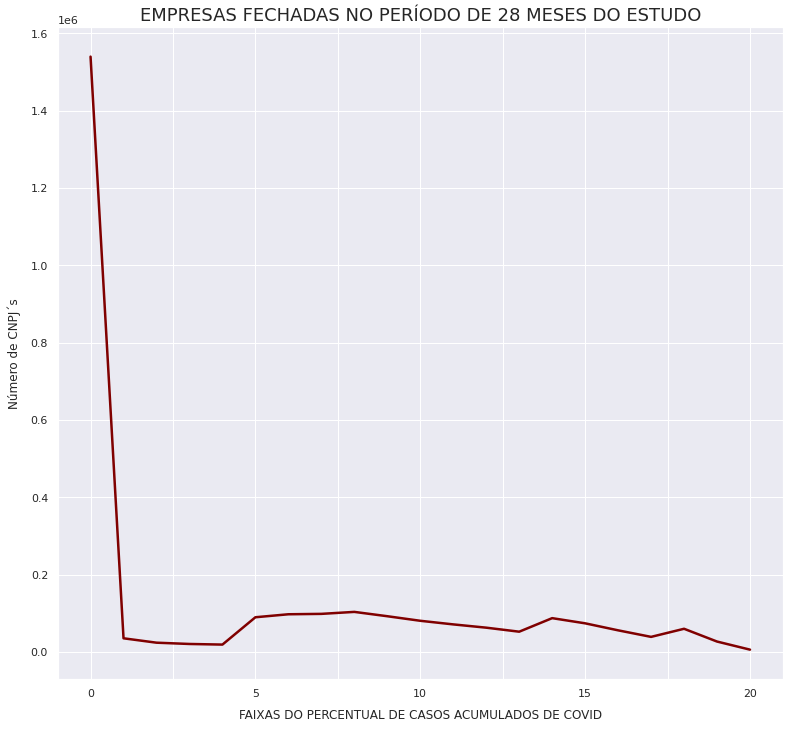

In [91]:
sns.set(font_scale=1)
cnpj_final_fechadas_total_graf_covid.plot(figsize=(13, 12), linewidth=2.5, color=['maroon','blue'])
plt.xlabel("FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID", labelpad=10)
plt.ylabel("Número de CNPJ´s", labelpad=10)
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 28 MESES DO ESTUDO", y=1, fontsize=18);

**2) ANÁLISE SOMENTE DAS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE COVID DE 14 MESES**

Nesse caso, iremos considerar somente as empresas que fecharam durante os 14 meses de COVID (01/04/2020 a 31/05/2021) pois nos 14 meses anteriores não tivemos casos de COVID.

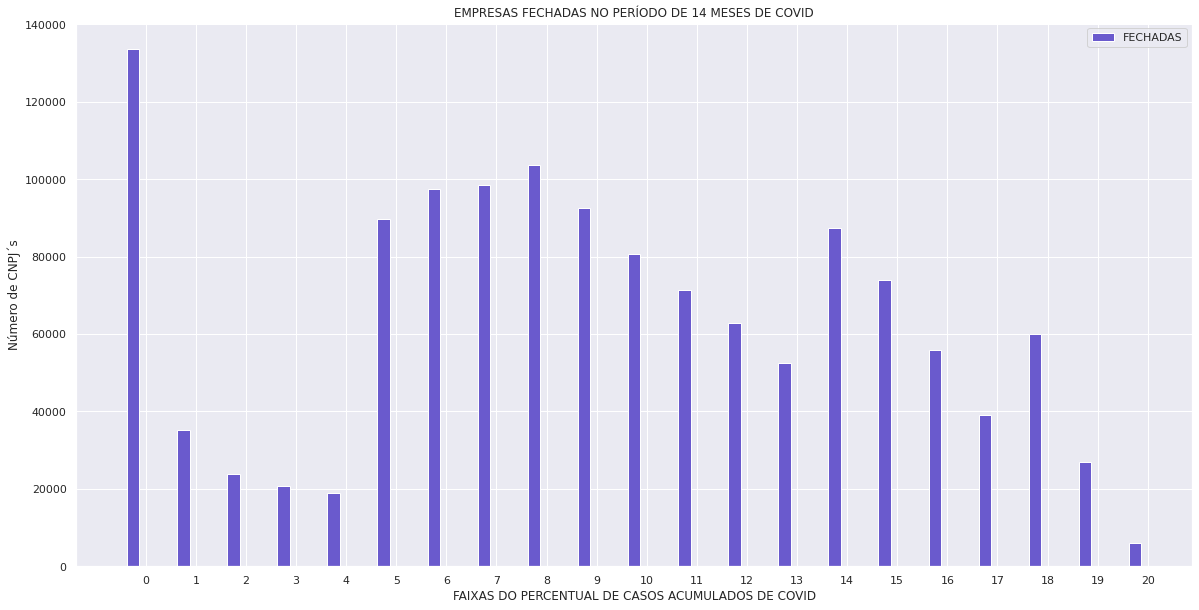

In [92]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_com_covid))

plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_com_covid, color='#6A5ACD', width=barWidth, label='FECHADAS')


plt.xlabel('FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_com_covid))], cnpj_final_fechadas_total_graf_com_covid.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID")


plt.legend()
plt.show()

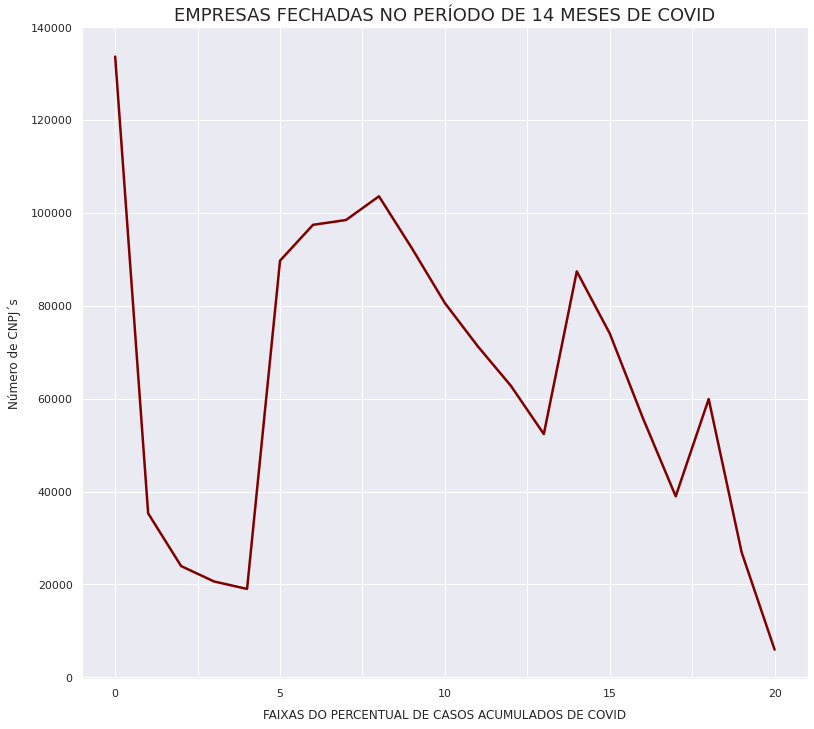

In [93]:
sns.set(font_scale=1)
cnpj_final_fechadas_total_graf_com_covid.plot(figsize=(13, 12), linewidth=2.5, color=['maroon','blue'])
plt.xlabel("FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID", labelpad=10)
plt.ylabel("Número de CNPJ´s", labelpad=10)
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID", y=1, fontsize=18);

**ANÁLISE DA EMPRESAS QUE ABRIRAM E FECHARAM CONSIDERANDO O PIB PER CAPITA DO MUNICÍPIO POR FAIXA**

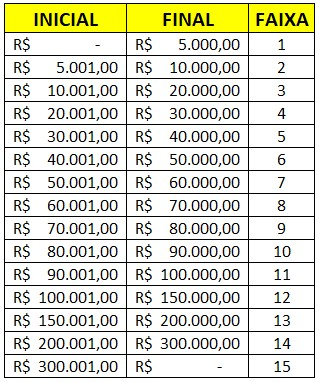

In [94]:
cnpj_final_abertas_total_graf_pib = cnpj_final_abertas_total.groupby('pib_per_capita_faixas')['pib_per_capita_faixas'].count()
cnpj_final_fechadas_total_graf_pib = cnpj_final_fechadas_total.groupby('pib_per_capita_faixas')['pib_per_capita_faixas'].count()

In [95]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_pib))
r2 = [x+barWidth for x in r1]

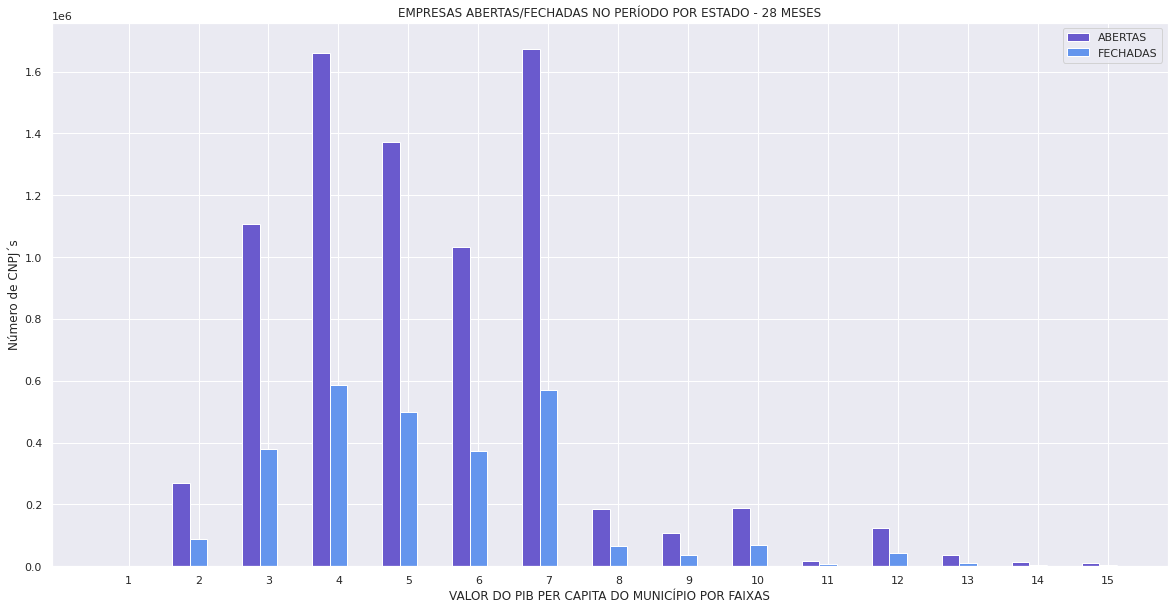

In [96]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_pib, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_pib, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('VALOR DO PIB PER CAPITA DO MUNICÍPIO POR FAIXAS')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_pib))], cnpj_final_abertas_total_graf_pib.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR ESTADO - 28 MESES")


plt.legend()
plt.show()

In [97]:
cnpj_final.shape

(10534042, 38)

In [98]:
cnpj_final

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,capital_social,capital_social_faixas,codigo_situacao_cadastral,data_inicio_atividade,data_situacao_cadastral,data_situacao_cadastral_ano_mes,situacao_cadastral_modelo,codigo_ibge,descricao_municipio,regiao,estado,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,IDH DO MUNICIPIO,IDHM EDUCACAO DO MUNICIPIO,IDHM LONGEVIDADE DO MUNICIPIO,IDHM RENDA DO MUNICIPIO,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,populacaoTCU2019,PIB,PIB PER CAPITA,pib_per_capita_faixas,cnae_principal,cnae_divisao,cnae_secao_numero,cnae_secao,cnae_descricao
0,29880642,0001,04,1,2000.0,1,08,20180308,20190921,201909,1,3550308,SAO PAULO,Sudeste,SP,0.0,0.0,0.000,0.000,0,0,0.805,0.725,0.843,0.855,8,7,8,8,12252023.0,7.146834e+11,58691.90,7,8712300,87,17,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS
1,29880783,0001,27,1,95400.0,6,08,20180308,20200106,202001,1,3110301,CALDAS,Sudeste,MG,0.0,0.0,0.000,0.000,0,0,0.687,0.529,0.701,0.873,6,5,7,8,14480.0,2.365185e+08,16405.53,3,8630503,86,17,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS
2,29880797,0001,40,1,3500.0,1,08,20180308,20200507,202005,1,3170206,UBERLANDIA,Sudeste,MG,199.0,9.0,0.029,0.001,0,0,0.789,0.716,0.776,0.885,7,7,7,8,691305.0,3.744279e+10,54801.25,7,9511800,95,19,s,OUTRAS ATIVIDADES DE SERVIÇOS
3,29880805,0001,59,1,10000.0,2,08,20180308,20190213,201902,1,3526100,JUQUIA,Sudeste,SP,0.0,0.0,0.000,0.000,0,0,0.700,0.637,0.654,0.823,6,6,6,8,18812.0,3.288989e+08,17394.70,3,5620104,56,9,i,ALOJAMENTO E ALIMENTAÇÃO
4,29880816,0001,39,1,1000.0,1,08,20180308,20190808,201908,1,2800308,ARACAJU,Nordeste,SE,0.0,0.0,0.000,0.000,0,0,0.770,0.708,0.784,0.823,7,7,7,8,657013.0,1.727630e+10,26622.38,4,9602501,96,19,s,OUTRAS ATIVIDADES DE SERVIÇOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157252,29880238,0001,30,1,40000.0,4,08,20180308,20190401,201904,1,4202404,BLUMENAU,Sul,SC,0.0,0.0,0.000,0.000,0,0,0.806,0.722,0.812,0.894,8,7,8,8,357199.0,1.695878e+10,48115.48,6,4772500,47,7,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...
11157253,29880354,0001,50,1,5000.0,1,02,20180308,20210527,202105,0,1200500,SENA MADUREIRA,Norte,AC,5687.0,63.0,12.404,0.137,19,3,0.603,0.456,0.593,0.810,6,4,5,8,45848.0,5.184161e+08,11475.22,3,4712100,47,7,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...
11157254,29880380,0001,88,1,1000.0,1,08,20180308,20190516,201905,1,3550308,SAO PAULO,Sudeste,SP,0.0,0.0,0.000,0.000,0,0,0.805,0.725,0.843,0.855,8,7,8,8,12252023.0,7.146834e+11,58691.90,7,7319002,73,13,m,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS"
11157255,26520602,0001,63,1,1000.0,1,08,20161110,20191219,201912,1,3550308,SAO PAULO,Sudeste,SP,0.0,0.0,0.000,0.000,0,0,0.805,0.725,0.843,0.855,8,7,8,8,12252023.0,7.146834e+11,58691.90,7,4789004,47,7,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...
